## Sean Nassimiha - Using a CNN to classify MNIST Digits

In this notebook I will develop two different CNN to classify digits from the MNIST database. I will firstly develop a single convolutional layer network, and then a multiple convolutional layer network, trying to create highly performing and efficient network. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Setting figure parameters
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

plt.style.use('ggplot')

#Useful for debugging problems
print(tf.__version__)

2.3.0


In [2]:
mnist = keras.datasets.mnist   #Uploading the MNIST database

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Here, I am reshaping the input images so that they can be used as an input for the CNN.

In [3]:
train_images = train_images.reshape((train_images.shape[0], 28,28,1))
test_images = test_images.reshape((test_images.shape[0], 28,28,1))

In [4]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
#checking the dimensions of the various datasets.
print("Shape of training images:",train_images.shape)
print("Length of training set labels:",len(train_labels))
print("Shape of testing images:",test_images.shape)
print("Length of testing set labels:",len(test_labels))

Shape of training images: (60000, 28, 28, 1)
Length of training set labels: 60000
Shape of testing images: (10000, 28, 28, 1)
Length of testing set labels: 10000


## Creating the First model
The pipeline for the decision of the best model was inspired by this kaggle tutorial: https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist

The pipeline was obviously adapted to suit the specific needs of this notebook. 
To understand how to create the best possible network, we need to define and fine-tune some of the hyperparameters. We will explore different possibilities for every hyperparameter, and will then compare them to see which one is most efficient.

### What should be the number of feature maps in the convolutional layer?

We will start by exploring this question. The convolutional layer in fact could have 8, 16, 24, 32, 48, 64, etc. feature maps, and this hyperparameter must be correctly tuned. 

In [6]:
iterations = 7 #selecting number of models to iterate on
model = [0] *iterations #creating a list with 6 zeros  

for j in range(iterations): #iterating over different feature maps
    model[j] = keras.models.Sequential()
    model[j].add(keras.layers.Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(28,28,1))) #convolutional layer
    model[j].add(keras.layers.Flatten())
    model[j].add(keras.layers.Dense(128, activation='relu')) #dense layer
    model[j].add(keras.layers.Dense(10)) #output layer
    model[j].compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
history = [0] * iterations #creating a list for the histories  
for j in range(iterations): #iterating
    history[j] = model[j].fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=0)
    
    print("Network %1.0f maps: Train accuracy=%2.5f, Validation accuracy=%3.5f"%(j*8+8,
                    max(history[j].history['accuracy']),max(history[j].history['val_accuracy']))) #printing accuracies for various models
    


Network 8 maps: Train accuracy=0.99938, Validation accuracy=0.98740
Network 16 maps: Train accuracy=0.99942, Validation accuracy=0.98790
Network 24 maps: Train accuracy=0.99938, Validation accuracy=0.98800
Network 32 maps: Train accuracy=0.99945, Validation accuracy=0.98940
Network 40 maps: Train accuracy=0.99938, Validation accuracy=0.98840
Network 48 maps: Train accuracy=0.99957, Validation accuracy=0.98850
Network 56 maps: Train accuracy=0.99962, Validation accuracy=0.98930


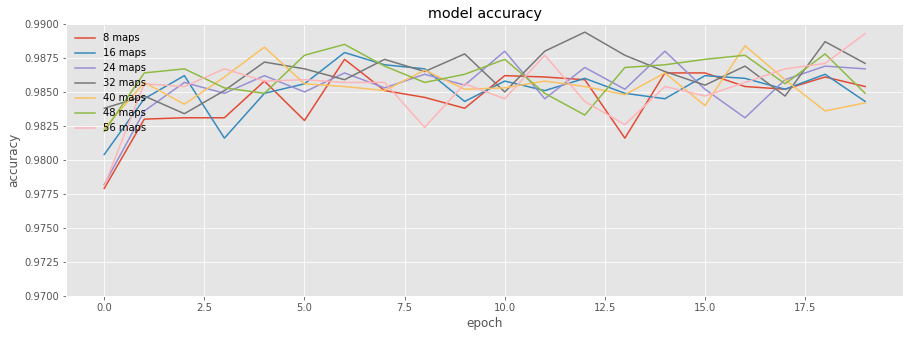

In [8]:
names = [] #initialising the list of names for label
#plotting the accuracies
plt.figure(figsize=(15,5))
for i in range(iterations):
    plt.plot(history[i].history['val_accuracy'])
    names.append(str("%1.0f maps")%(i*8+8))

#setting plot labels and title
plt.legend(names, loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
axes = plt.gca()
axes.set_ylim([0.97,0.99])
plt.show()

It seems that 32 maps in the convolutional layer is the best number. 

### What size should the convolution kernel be? 

The kernel could be (3,3) , (5,5) , (7,7) etc. Different sizes can be used to extract image features of different size, and therefore it is usually chosen according to the expected feature size in the image. 
In this case we could iterate between these three kernel sizes to see which one is most suitable.

In [9]:
iterations = 3 #selecting number of models to iterate on
model = [0] *iterations #creating a list with 6 zeros  

for j in range(iterations): #iterating over different kernel sizes
    model[j] = keras.models.Sequential()
    model[j].add(keras.layers.Conv2D(32,kernel_size=j*2 + 3,activation='relu',input_shape=(28,28,1))) #convolutional layer
    model[j].add(keras.layers.Flatten())
    model[j].add(keras.layers.Dense(128, activation='relu')) #dense layer
    model[j].add(keras.layers.Dense(10)) #output layer
    model[j].compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = [0] * iterations #creating a list for the histories  
for j in range(iterations): #iterating
    history[j] = model[j].fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=0)
    
    print("Network %1.0f kernel size: Train accuracy=%2.5f, Validation accuracy=%3.5f"%(j*2+3,max(history[j].history['accuracy']),max(history[j].history['val_accuracy'])))
    

Network 3 kernel size: Train accuracy=0.99967, Validation accuracy=0.98570
Network 5 kernel size: Train accuracy=0.99953, Validation accuracy=0.98820
Network 7 kernel size: Train accuracy=0.99945, Validation accuracy=0.98930


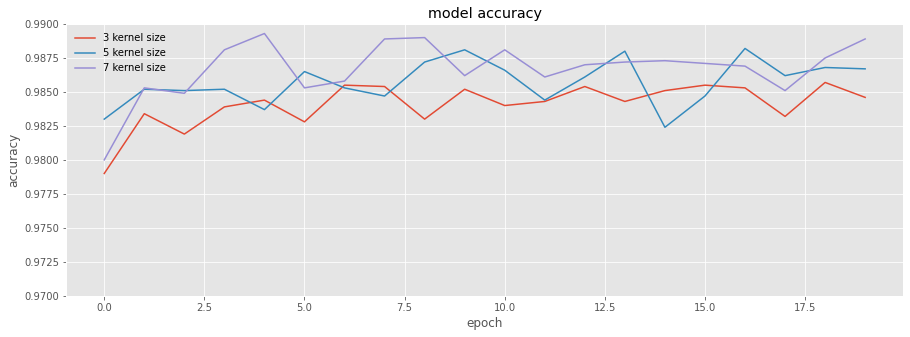

In [11]:
names = []
#plotting the accuracies
plt.figure(figsize=(15,5))
for i in range(iterations):
    plt.plot(history[i].history['val_accuracy'])
    names.append(str("%1.0f kernel size")%(i*2 + 3))

plt.legend(names, loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
axes = plt.gca()
axes.set_ylim([0.97,0.99])
plt.show()

It is clear that a kernel of size 3 is not big enough to collect all the feature information from the images. A kernel size of 5 will be chosen.

### Choosing the best Dense Layer

After having established what is the most suitable feature map number, we can find what is the most suitable size of dense layer. This will be done in the same fashion as earlier.

The tested dense layers will be with: 16, 32, 64, 128, 256, 512 neurons.

In [12]:
iterations = 6 #selecting number of models to iterate on
model = [0] *iterations #creating a list with 6 zeros  

for j in range(iterations): #iterating over different neurons values in dense layer
    model[j] = keras.models.Sequential()
    model[j].add(keras.layers.Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1))) #convolutional layer
    model[j].add(keras.layers.Flatten())
    model[j].add(keras.layers.Dense(2**(j+4), activation='relu')) #dense layer
    model[j].add(keras.layers.Dense(10)) #output layer
    model[j].compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history = [0] * iterations #creating a list for the histories  
for j in range(iterations): #iterating
    history[j] = model[j].fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=0)
    
    print("Network %1.0f neurons: Train accuracy=%2.5f, Validation accuracy=%3.5f"%(2**(j+4),max(history[j].history['accuracy']),max(history[j].history['val_accuracy'])))
    


Network 16 neurons: Train accuracy=0.99908, Validation accuracy=0.98600
Network 32 neurons: Train accuracy=0.99935, Validation accuracy=0.98750
Network 64 neurons: Train accuracy=0.99928, Validation accuracy=0.98720
Network 128 neurons: Train accuracy=0.99978, Validation accuracy=0.98730
Network 256 neurons: Train accuracy=0.99968, Validation accuracy=0.98860
Network 512 neurons: Train accuracy=0.99963, Validation accuracy=0.98860


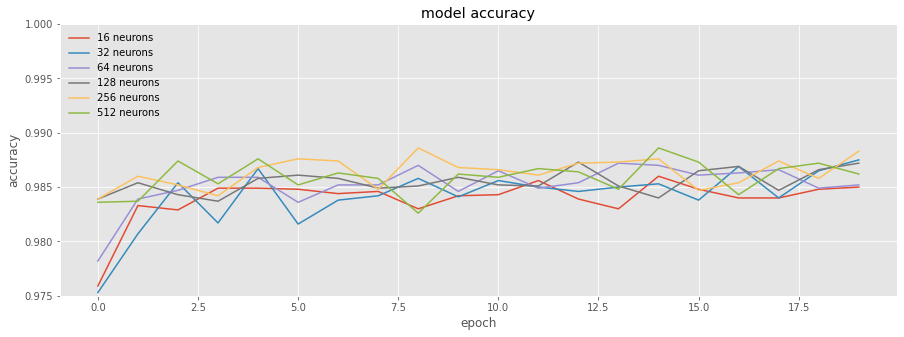

In [14]:
names = []
#plotting the accuracies
plt.figure(figsize=(15,5))
for i in range(iterations):
    plt.plot(history[i].history['val_accuracy'])
    names.append(str("%1.0f neurons")%(2**(i+4)))

plt.legend(names, loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
axes = plt.gca()
axes.set_ylim([0.975,1])
plt.show()

It seems that the best number of neurons for the dense layer is 128.

### Value of dropout?

To avoid overfitting, dropout could be implemented. But what should be the correct value between 0 and 1?
Trying for different values: 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6 below:

In [15]:
iterations = 7 #selecting number of models to iterate on
model = [0] *iterations #creating a list with 6 zeros  

for j in range(iterations): #iterating over different dropout values
    model[j] = keras.models.Sequential()
    model[j].add(keras.layers.Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1))) #convolutional layer
    model[j].add(keras.layers.Dropout(j*0.1))
    model[j].add(keras.layers.Flatten())
    model[j].add(keras.layers.Dense(128, activation='relu')) #dense layer
    model[j].add(keras.layers.Dropout(j*0.1))
    model[j].add(keras.layers.Dense(10)) #output layer
    model[j].compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
history = [0] * iterations #creating a list for the histories  
for j in range(iterations): #iterating
    history[j] = model[j].fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=0)
    
    print("Network %1.1f dropout: Train accuracy=%2.5f, Validation accuracy=%3.5f"%(j*0.1,max(history[j].history['accuracy']),max(history[j].history['val_accuracy'])))
    

Network 0.0 dropout: Train accuracy=0.99957, Validation accuracy=0.98840
Network 0.1 dropout: Train accuracy=0.99903, Validation accuracy=0.98830
Network 0.2 dropout: Train accuracy=0.99845, Validation accuracy=0.98920
Network 0.3 dropout: Train accuracy=0.99722, Validation accuracy=0.98970
Network 0.4 dropout: Train accuracy=0.99592, Validation accuracy=0.98960
Network 0.5 dropout: Train accuracy=0.99232, Validation accuracy=0.98990
Network 0.6 dropout: Train accuracy=0.98740, Validation accuracy=0.98980


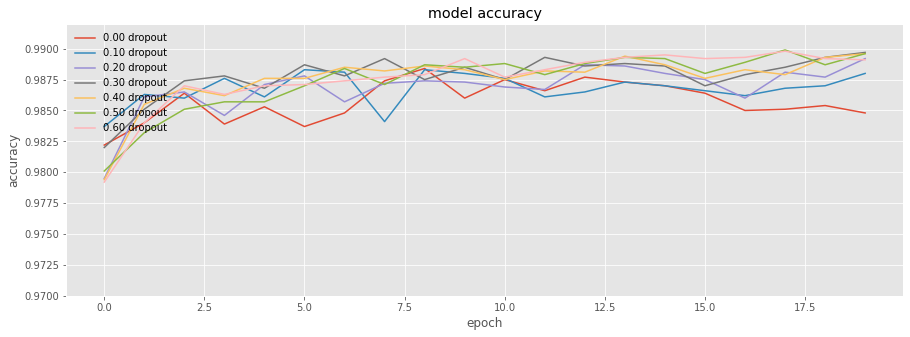

In [17]:
names = []
#plotting the accuracies
plt.figure(figsize=(15,5))
for i in range(iterations):
    plt.plot(history[i].history['val_accuracy'])
    names.append(str("%1.2f dropout")%(0.1*i))

plt.legend(names, loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
axes = plt.gca()
axes.set_ylim([0.97,0.992])
plt.show()

It seems that both 0.3 and 0.5 dropout gave the same results, and therefore by simply looking at the train accuracy, we will choose 0.3 dropout. 

The optimal architecture with one single convolutional layer is therefore the following:

### Optimal Architecture

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1))) #convolutional layer
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu')) #dense layer
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10)) #output layer
model.compile(optimizer='adam', 
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=0)

model.summary()


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)                1290      
Total params: 2,361,546
Trainable params: 2,361,546
Non-trainable params: 0
___________________________________________

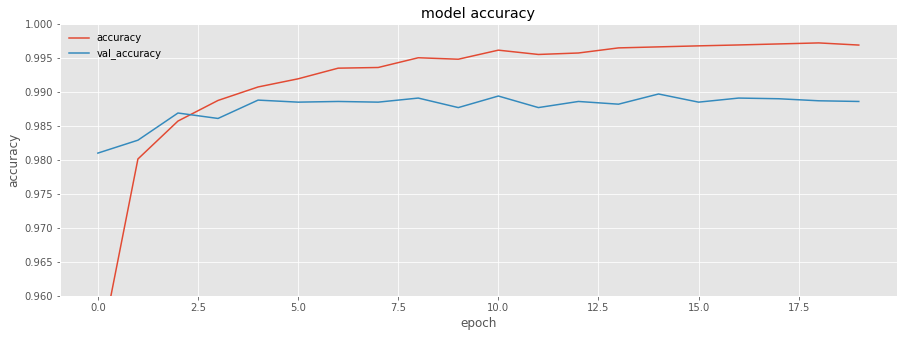

313/313 - 1s - loss: 0.0717 - accuracy: 0.9886
The final value for the Test Accuracy is: 0.9886000156402588


In [19]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend( loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
axes = plt.gca()
plt.ylim([0.96, 1])
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print("The final value for the Test Accuracy is:",test_acc)


Therefore the accuracy of the one-conv-layer network is of approximately 99% (considering that the value will fluctuate between different runs).

## Multiple Layer

We can conduct the same investigation, this time by allowing more convolutional layers to be added. 



### Choosing Number of Convolutional Layers

How many pairs of Convolution-Pooling should we have in the network? We could have 1,2,3... etc. pairs of convolutional layers. 

In [20]:
iterations = 3 #selecting number of models to iterate on
model = [0] *iterations #creating a list with 6 zeros  

for j in range(iterations): #iterating over numbers of pairs of convolution and pooling
    model[j] = keras.models.Sequential()
    model[j].add(keras.layers.Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1))) #convolutional layer
    model[j].add(keras.layers.MaxPool2D())
   
    if j>0:
            model[j].add(keras.layers.Conv2D(48,kernel_size=5,padding='same',activation='relu'))
            model[j].add(keras.layers.MaxPool2D())
    if j>1:
        model[j].add(keras.layers.Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(keras.layers.MaxPool2D(padding='same'))

    model[j].add(keras.layers.Flatten())
    model[j].add(keras.layers.Dense(128, activation='relu')) #dense layer
    model[j].add(keras.layers.Dense(10)) #output layer
    model[j].compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
history = [0] * iterations #creating a list for the histories  
for j in range(iterations): #iterating
    history[j] = model[j].fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=0)
    
    print("Network %1.0f convolutional layers: Train accuracy=%2.5f, Validation accuracy=%3.5f"%(j+1,max(history[j].history['accuracy']),max(history[j].history['val_accuracy'])))
    

Network 1 convolutional layers: Train accuracy=0.99937, Validation accuracy=0.98960
Network 2 convolutional layers: Train accuracy=0.99902, Validation accuracy=0.99400
Network 3 convolutional layers: Train accuracy=0.99878, Validation accuracy=0.99230


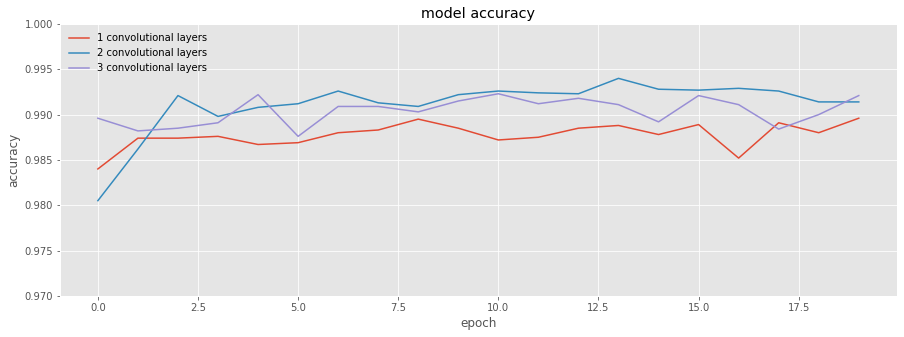

In [21]:
names = []
#plotting the accuracies
plt.figure(figsize=(15,5))
for i in range(iterations):
    plt.plot(history[i].history['val_accuracy'])
    names.append(str("%1.0f convolutional layers")%(i + 1))

plt.legend(names, loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
axes = plt.gca()
axes.set_ylim([0.97,1])
plt.show()

We can see that both 2 and 3 layers have good performance. Three layers however seem to be computationally heavier, and so I will choose two layers.

### Choosing Feature Map Size

In [22]:
iterations = 7 #selecting number of models to iterate on
model = [0] *iterations #creating a list with 6 zeros  

for j in range(iterations): #iterating over different feature maps
    model[j] = keras.models.Sequential()
    model[j].add(keras.layers.Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(28,28,1))) #convolutional layer
    model[j].add(keras.layers.MaxPool2D())
    model[j].add(keras.layers.Conv2D(j*16 + 16,kernel_size=5,padding='same',activation='relu'))
    model[j].add(keras.layers.MaxPool2D())
    model[j].add(keras.layers.Flatten())
    model[j].add(keras.layers.Dense(128, activation='relu')) #dense layer
    model[j].add(keras.layers.Dense(10)) #output layer
    model[j].compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
history = [0] * iterations #creating a list for the histories  
for j in range(iterations): #iterating
    history[j] = model[j].fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=0)
    
    print("Network %1.0f maps (1st layer): Train accuracy=%2.5f, Validation accuracy=%3.5f"%(j*8+8,max(history[j].history['accuracy']),max(history[j].history['val_accuracy'])))
    


Network 8 maps (1st layer): Train accuracy=0.99878, Validation accuracy=0.99180
Network 16 maps (1st layer): Train accuracy=0.99877, Validation accuracy=0.99270
Network 24 maps (1st layer): Train accuracy=0.99912, Validation accuracy=0.99350
Network 32 maps (1st layer): Train accuracy=0.99892, Validation accuracy=0.99280
Network 40 maps (1st layer): Train accuracy=0.99902, Validation accuracy=0.99280
Network 48 maps (1st layer): Train accuracy=0.99920, Validation accuracy=0.99340
Network 56 maps (1st layer): Train accuracy=0.99893, Validation accuracy=0.99320


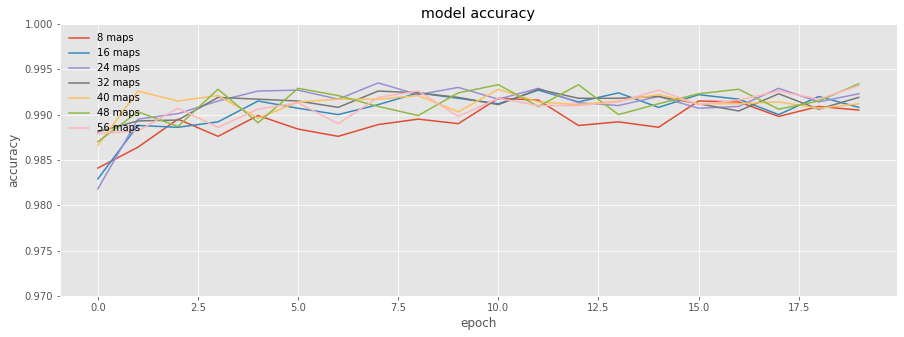

In [23]:
names = []
#plotting the accuracies
plt.figure(figsize=(15,5))
for i in range(iterations):
    plt.plot(history[i].history['val_accuracy'])
    names.append(str("%1.0f maps")%(i*8+8)) #labelling according to maps in first layer

plt.legend(names, loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
axes = plt.gca()
axes.set_ylim([0.97,1])
plt.show()

It seems here that a network with 48 maps in the first layer and 96 maps in the second layers performs better than the others. If computational costs was important (here the network is very fast to train so it should not be of worry) also a network with 16 (1st) and 32 (2nd) maps could be chosen. 

### Choosing Kernel Filter Size

In [24]:
iterations = 3 #selecting number of models to iterate on
model = [0] *iterations #creating a list with 6 zeros  

for j in range(iterations): #iterating over different filter sizes
    model[j] = keras.models.Sequential()
    model[j].add(keras.layers.Conv2D(48,kernel_size=j*2 + 3,activation='relu',input_shape=(28,28,1))) #convolutional layer
    model[j].add(keras.layers.MaxPool2D())
    model[j].add(keras.layers.Conv2D(96,kernel_size=j*2 + 3,padding='same',activation='relu'))
    model[j].add(keras.layers.MaxPool2D())
    model[j].add(keras.layers.Flatten())
    model[j].add(keras.layers.Dense(128, activation='relu')) #dense layer
    model[j].add(keras.layers.Dense(10)) #output layer
    model[j].compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
history = [0] * iterations #creating a list for the histories  
for j in range(iterations): #iterating
    history[j] = model[j].fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=0)

    print("Network %1.0f kernel size: Train accuracy=%2.5f, Validation accuracy=%3.5f"%(j*2+3,max(history[j].history['accuracy']),max(history[j].history['val_accuracy'])))


Network 3 kernel size: Train accuracy=0.99913, Validation accuracy=0.99270
Network 5 kernel size: Train accuracy=0.99922, Validation accuracy=0.99350
Network 7 kernel size: Train accuracy=0.99888, Validation accuracy=0.99320


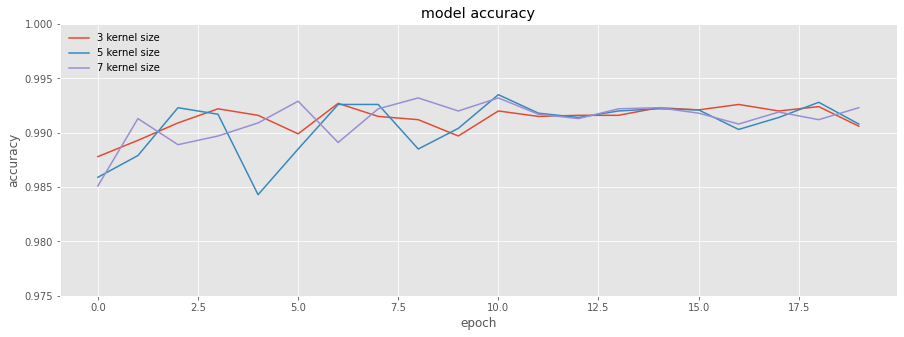

In [25]:
names = []
#plotting the accuracies
plt.figure(figsize=(15,5))
for i in range(iterations):
    plt.plot(history[i].history['val_accuracy'])
    names.append(str("%1.0f kernel size")%(i*2+3))

plt.legend(names, loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
axes = plt.gca()
axes.set_ylim([0.975,1])
plt.show()

The filter with size (5x5) has been found to be the best one again, after re-running the cell multiple times. 

### Choosing Dense Layer Size

In [26]:
iterations = 6 #selecting number of models to iterate on
model = [0] *iterations #creating a list with 6 zeros  

for j in range(iterations): #iterating over different dense layer sizes
    model[j] = keras.models.Sequential()
    model[j].add(keras.layers.Conv2D(48,kernel_size=5,activation='relu',input_shape=(28,28,1))) #convolutional layer
    model[j].add(keras.layers.MaxPool2D())
    model[j].add(keras.layers.Conv2D(96,kernel_size=5,padding='same',activation='relu'))
    model[j].add(keras.layers.MaxPool2D())
    model[j].add(keras.layers.Flatten())
    model[j].add(keras.layers.Dense(2**(j+4), activation='relu')) #dense layer
    model[j].add(keras.layers.Dense(10)) #output layer
    model[j].compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
history = [0] * iterations #creating a list for the histories  
for j in range(iterations): #iterating
    history[j] = model[j].fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=0)
    
    print("Network %1.0f neurons: Train accuracy=%2.5f, Validation accuracy=%3.5f"%(2**(j+4),max(history[j].history['accuracy']),max(history[j].history['val_accuracy'])))
    

Network 16 neurons: Train accuracy=0.99917, Validation accuracy=0.99350
Network 32 neurons: Train accuracy=0.99965, Validation accuracy=0.99310
Network 64 neurons: Train accuracy=0.99923, Validation accuracy=0.99380
Network 128 neurons: Train accuracy=0.99898, Validation accuracy=0.99390
Network 256 neurons: Train accuracy=0.99910, Validation accuracy=0.99350
Network 512 neurons: Train accuracy=0.99915, Validation accuracy=0.99380


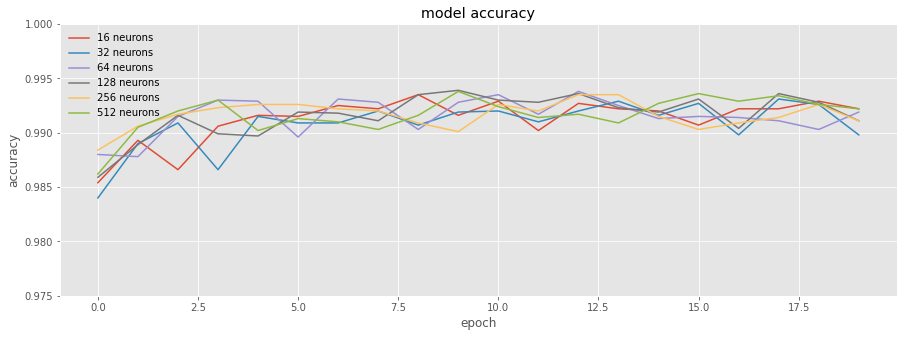

In [27]:
names = []
#plotting the accuracies
plt.figure(figsize=(15,5))
for i in range(iterations):
    plt.plot(history[i].history['val_accuracy'])
    names.append(str("%1.0f neurons")%(2**(i+4)))

plt.legend(names, loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
axes = plt.gca()
axes.set_ylim([0.975,1])
plt.show()

All of the networks seem to have a similar performance. The best network, considering both final accuracy and low oscillations in values throughout the training, is the one with 128 nodes in the fully connected layer.

### Choosing Dropout Value

In [28]:
iterations = 7 #selecting number of models to iterate on
model = [0] *iterations #creating a list with 6 zeros  

for j in range(iterations): #iterating over different dropout values
    model[j] = keras.models.Sequential()
    model[j].add(keras.layers.Conv2D(48,kernel_size=5,activation='relu',input_shape=(28,28,1))) #convolutional layer
    model[j].add(keras.layers.MaxPool2D())
    model[j].add(keras.layers.Dropout(j*0.1))
    model[j].add(keras.layers.Conv2D(96,kernel_size=5,padding='same',activation='relu'))
    model[j].add(keras.layers.MaxPool2D())
    model[j].add(keras.layers.Dropout(j*0.1))
    model[j].add(keras.layers.Flatten())
    model[j].add(keras.layers.Dense(128, activation='relu')) #dense layer
    model[j].add(keras.layers.Dropout(j*0.1))
    model[j].add(keras.layers.Dense(10)) #output layer
    model[j].compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
history = [0] * iterations #creating a list for the histories  
for j in range(iterations): #iterating
    history[j] = model[j].fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=0)
    
    print("Network %1.1f dropout: Train accuracy=%2.5f, Validation accuracy=%3.5f"%(j*0.1,max(history[j].history['accuracy']),max(history[j].history['val_accuracy'])))
    

Network 0.0 dropout: Train accuracy=0.99900, Validation accuracy=0.99400
Network 0.1 dropout: Train accuracy=0.99832, Validation accuracy=0.99430
Network 0.2 dropout: Train accuracy=0.99725, Validation accuracy=0.99390
Network 0.3 dropout: Train accuracy=0.99545, Validation accuracy=0.99440
Network 0.4 dropout: Train accuracy=0.99183, Validation accuracy=0.99530
Network 0.5 dropout: Train accuracy=0.98720, Validation accuracy=0.99530
Network 0.6 dropout: Train accuracy=0.97878, Validation accuracy=0.99350


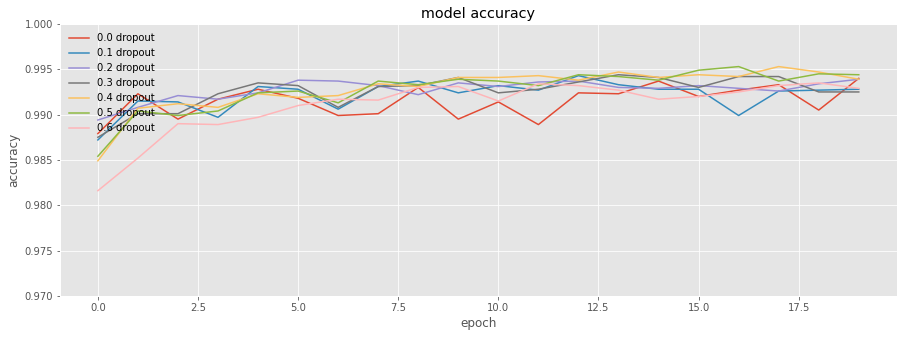

In [29]:
names = []
#plotting the accuracies
plt.figure(figsize=(15,5))
for i in range(iterations):
    plt.plot(history[i].history['val_accuracy'])
    names.append(str(("%1.1f dropout")%(0.1*i)))

plt.legend(names, loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
axes = plt.gca()
axes.set_ylim([0.97,1])
plt.show()

Again, a dropout of 0.3 seems to be the best value for the network. 

### Final Network Architecture
The final architecture is therefore:

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(48,kernel_size=5,activation='relu',input_shape=(28,28,1))) #convolutional layer
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(96,kernel_size=5,padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu')) #dense layer
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10)) #output layer
model.compile(optimizer='adam', 
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels), verbose=0)

model.summary()


Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 24, 24, 48)        1248      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 12, 12, 48)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 12, 12, 48)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 12, 12, 96)        115296    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 6, 6, 96)          0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 6, 6, 96)          0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 3456)            

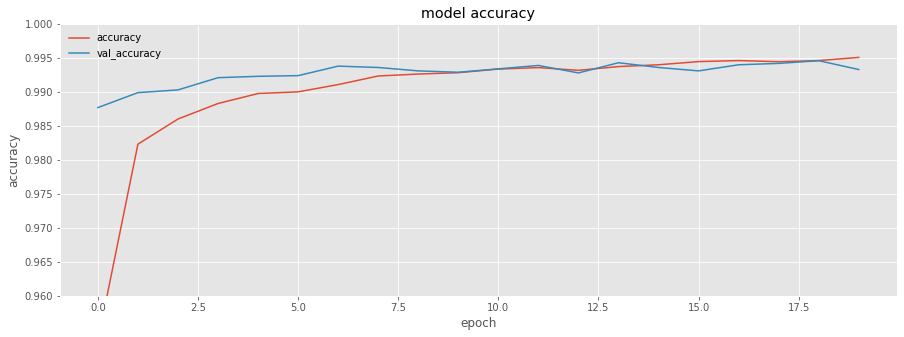

313/313 - 1s - loss: 0.0276 - accuracy: 0.9933
The final value for the Test Accuracy is: 0.9933000206947327


In [31]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend( loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
axes = plt.gca()
plt.ylim([0.96, 1])
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print("The final value for the Test Accuracy is:",test_acc)

In conclusion, this last model was found to have an accuracy of 99.3%. 